# Flight Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Training Data

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# duplicate records
df[df.duplicated()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(10463, 11)

In [11]:
# checking null valeus
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [24]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [26]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [28]:
df.drop(index=[9039],inplace=True)

In [29]:
df.isnull().sum().sum()

0

In [37]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Plotting Ticket Prices VS Airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

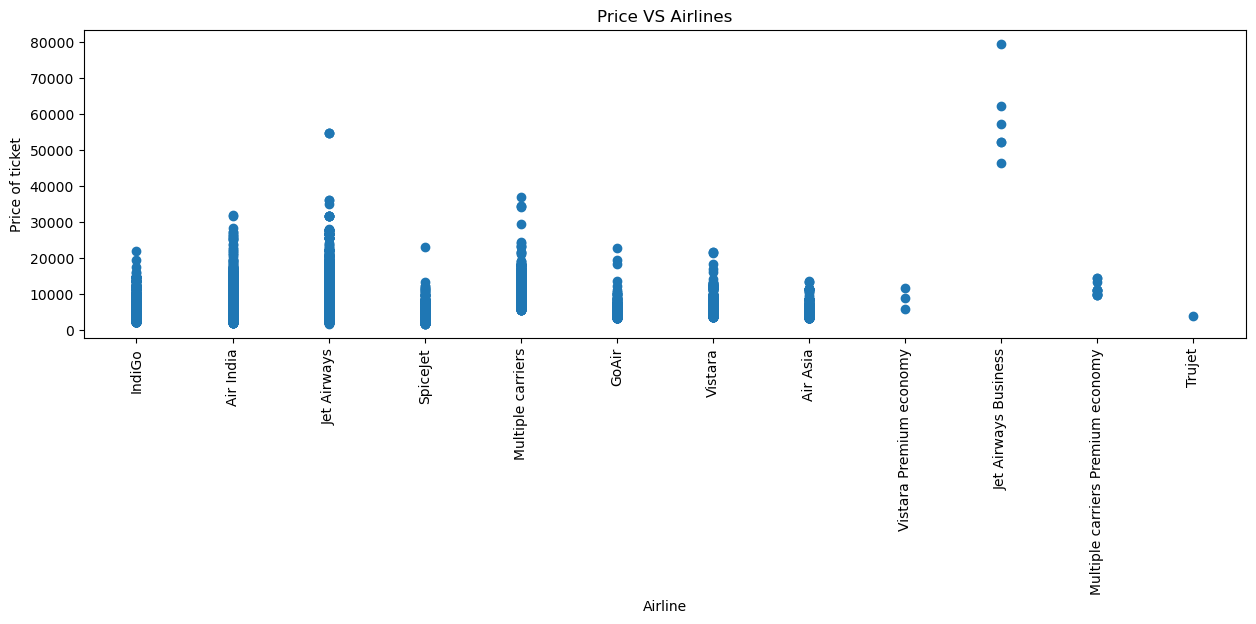

In [38]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

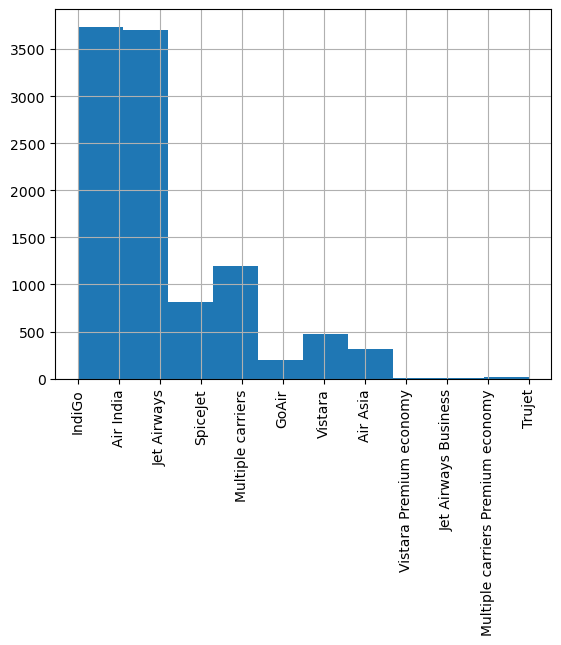

In [48]:
df['Airline'].hist()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

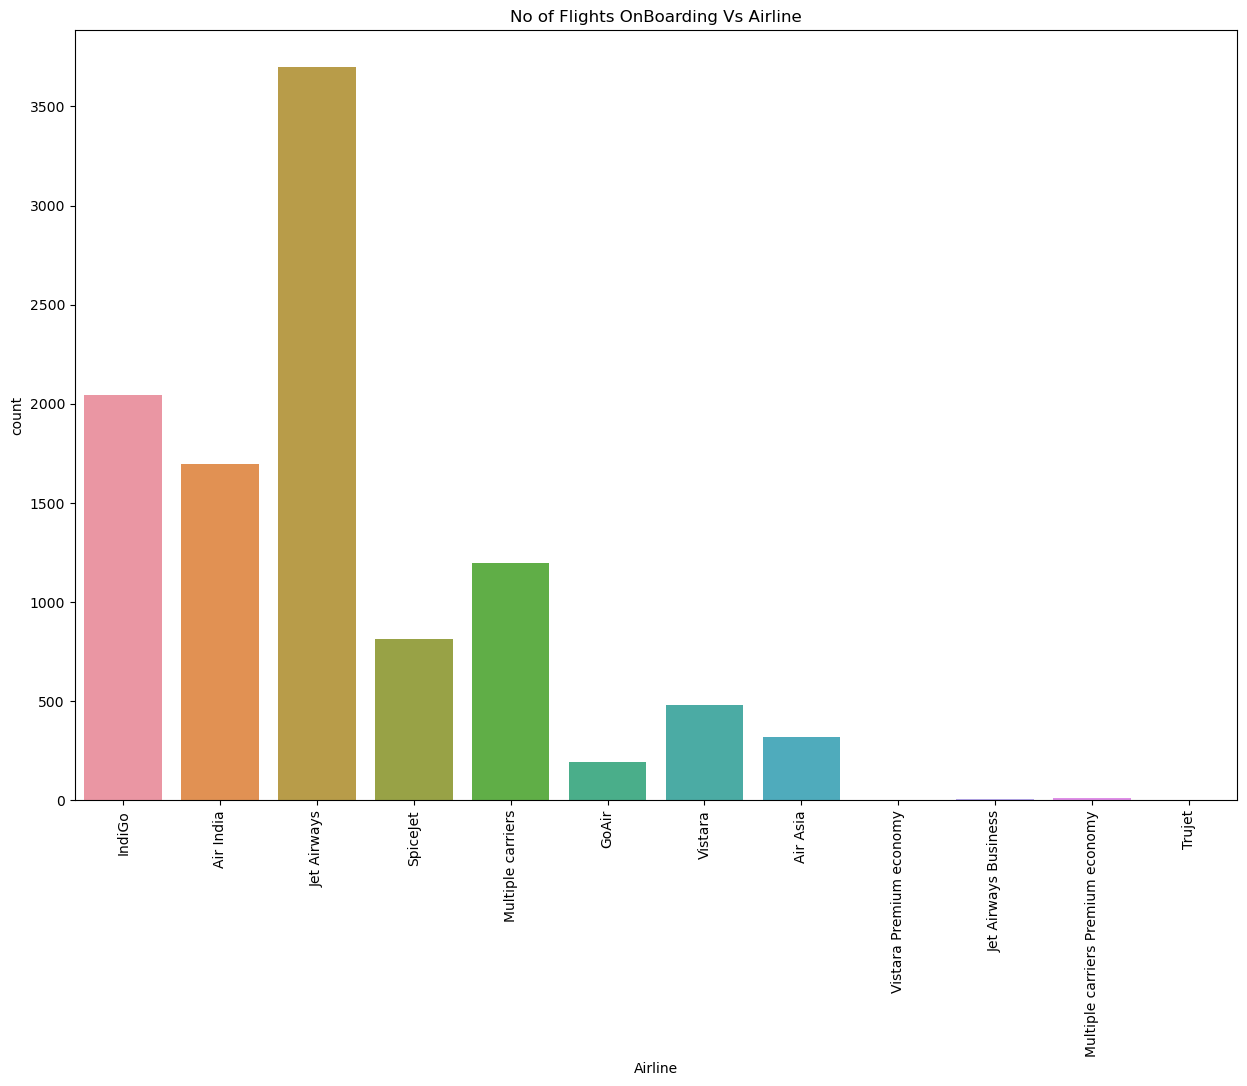

In [52]:
plt.figure(figsize=(15,10))
plt.title("No of Flights OnBoarding Vs Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

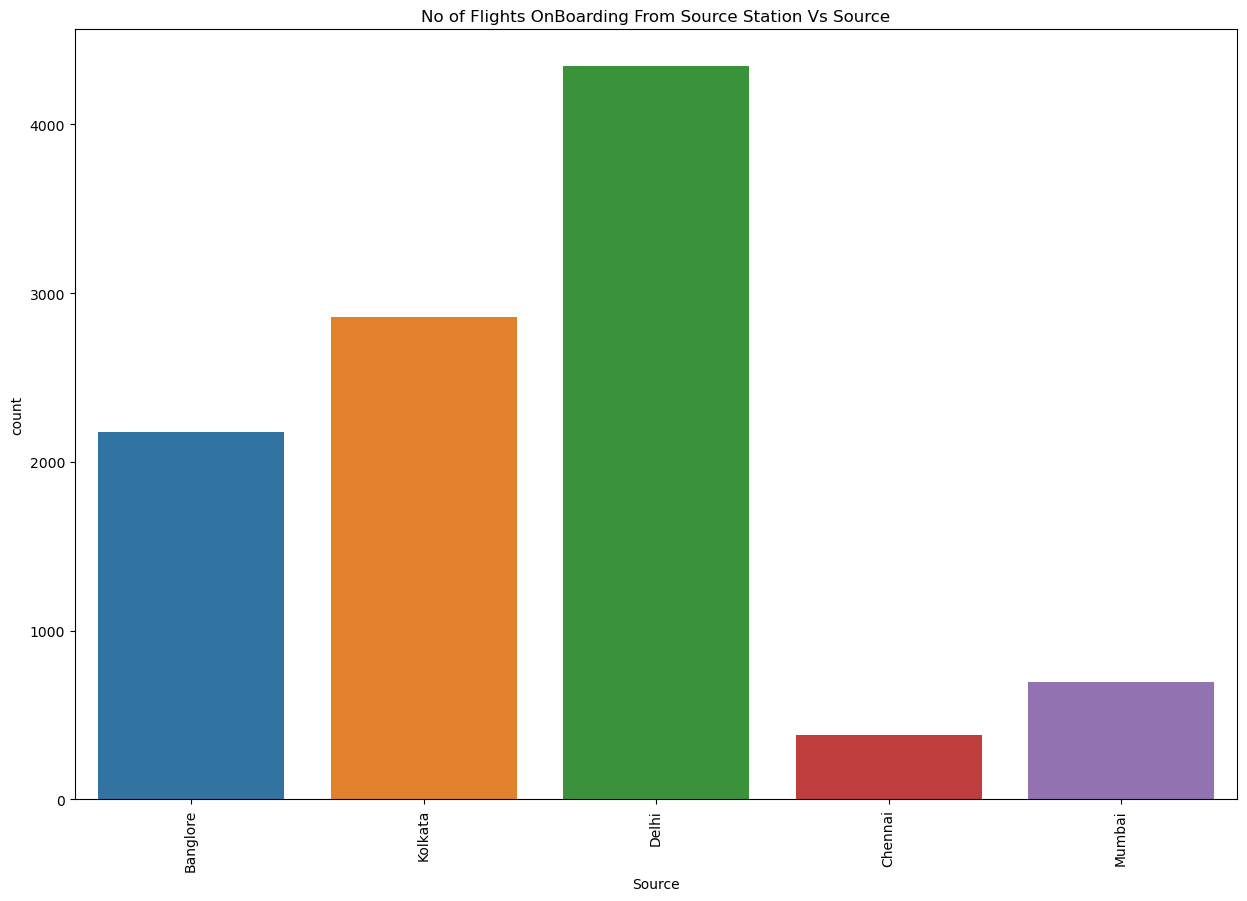

In [53]:
plt.figure(figsize=(15,10))
plt.title("No of Flights OnBoarding From Source Station Vs Source")
plt.xlabel("Source Station")
plt.ylabel("Count")
sns.countplot(x='Source',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

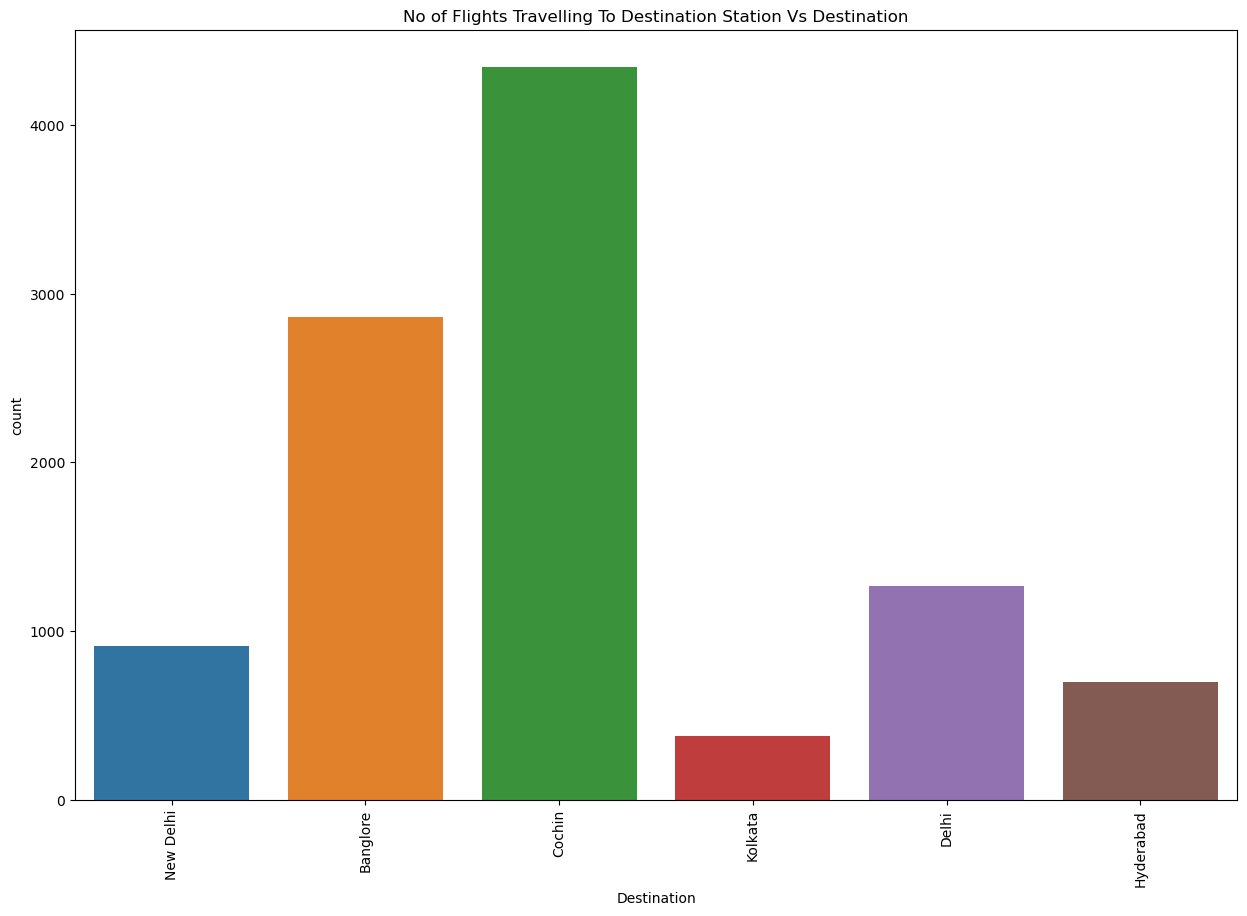

In [55]:
plt.figure(figsize=(15,10))
plt.title("No of Flights Travelling To Destination Station Vs Destination")
plt.xlabel("Destination Station")
plt.ylabel("Count")
sns.countplot(x='Destination',data=df)
plt.xticks(rotation=90)

In [62]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [63]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [65]:
df['Day']=df['Date_of_Journey'].dt.day

In [66]:
df['day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: day, Length: 10462, dtype: int64

In [67]:
df['month']=df['Date_of_Journey'].dt.month

In [68]:
df['year']=df['Date_of_Journey'].dt.year

In [69]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [70]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [71]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [72]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [82]:
l=[1,2,3]

In [83]:
l[0]

1

In [92]:
df['Dep_Hr']=df['Dep_Time'].str.split(":").str[0].astype(int)
df['Dep_Min']=df['Dep_Time'].str.split(":").str[1].astype(int)

In [95]:
df['Arrival_Time']=df['Arrival_Time'].str[:6]

In [97]:
df['Arrival_Hr']=df['Arrival_Time'].str.split(":").str[0].astype(int)
df['Arrival_Min']=df['Arrival_Time'].str.split(":").str[1].astype(int)

In [106]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(" ","+").str.replace("m","1").apply(eval)

In [100]:
df.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [107]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,621,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,671,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,551,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,691,1 stop,No info,13302,3,1,2019,16,50,21,35


In [108]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration            int64
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Dep_Hr              int32
Dep_Min             int32
Arrival_Hr          int32
Arrival_Min         int32
dtype: object

### Encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [113]:
df['Airline']=encoder.fit_transform(df['Airline'])

In [114]:
df['Airline']

0         3
1         1
2         4
3         3
4         3
         ..
10678     0
10679     1
10680     4
10681    10
10682     1
Name: Airline, Length: 10462, dtype: int32

In [115]:
df['Source']=encoder.fit_transform(df['Source'])
df['Destination']=encoder.fit_transform(df['Destination'])
df['Route']=encoder.fit_transform(df['Route'])
df['Total_Stops']=encoder.fit_transform(df['Total_Stops'])

In [128]:
df['Additional_Info']=encoder.fit_transform(df['Additional_Info'])

In [129]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,3,0,5,18,621,4,8,3897,24,3,2019,22,20,1,10
1,1,3,0,84,671,1,8,7662,5,1,2019,5,50,13,15
2,4,2,1,118,1140,1,8,13882,6,9,2019,9,25,4,25
3,3,3,0,91,551,0,8,6218,5,12,2019,18,5,23,30
4,3,0,5,29,691,0,8,13302,3,1,2019,16,50,21,35


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int32
 1   Source           10462 non-null  int32
 2   Destination      10462 non-null  int32
 3   Route            10462 non-null  int32
 4   Duration         10462 non-null  int64
 5   Total_Stops      10462 non-null  int32
 6   Additional_Info  10462 non-null  int32
 7   Price            10462 non-null  int64
 8   day              10462 non-null  int64
 9   month            10462 non-null  int64
 10  year             10462 non-null  int64
 11  Dep_Hr           10462 non-null  int32
 12  Dep_Min          10462 non-null  int32
 13  Arrival_Hr       10462 non-null  int32
 14  Arrival_Min      10462 non-null  int32
dtypes: int32(10), int64(5)
memory usage: 1.1 MB


In [131]:
X=df.drop('Price',axis=1)
y=df['Price']

In [132]:
X.shape

(10462, 14)

In [133]:
y.shape

(10462,)

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [136]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7846, 14), (2616, 14), (7846,), (2616,))

# Model Training

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [137]:
model=RandomForestRegressor()

In [138]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [139]:
model.score(X_train,y_train)

0.981161668277155

In [140]:
y_pred=model.predict(X_test)

In [141]:
y_pred

array([15280.38,  3876.99,  4243.35, ..., 14140.96, 14620.32,  4114.88])

In [145]:
r2_score(y_test,y_pred)

0.8853853732351782